In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [67]:
figure_data = pl.read_parquet("figure_data.parquet")
figure_data 

pmcid,fig_id,fig_label,fig_title,fig_desc,image_url
str,str,str,str,str,str
"""10937393""","""Fig1""","""Fig. 1""","""FANS-based iso…","""a, Schematic r…","""https://www.nc…"
"""10937393""","""Fig2""","""Fig. 2""","""Purity and rep…","""a, Heatmaps de…","""https://www.nc…"
"""10937393""","""Fig3""","""Fig. 3""","""mHTT CAG tract…","""a, Length dist…","""https://www.nc…"
"""10937393""","""Fig4""","""Fig. 4""","""Expansion of m…","""a,b, Length di…","""https://www.nc…"
"""10937393""","""Fig5""","""Fig. 5""","""MSNs are prone…","""a, Length dist…","""https://www.nc…"
…,…,…,…,…,…
"""10260399""","""Fig11""","""Extended Data …","""k-mer mapping …","""a, Dotplot sho…","""https://www.nc…"
"""10260398""","""Fig1""","""Fig. 1""","""GWAS meta-anal…","""a, Manhattan p…","""https://www.nc…"
"""10260398""","""Fig2""","""Fig. 2""","""Enrichment of …","""a, Top, repres…","""https://www.nc…"


In [74]:
import re

def count_subfigures(caption):
    patterns = [
        r"(?:^|\.\s)([a-z](?=,))", # a, 
        r"(?:^|\.\s|,\s)([a-z])\.", # a.
        r"(?:^|\.\s|,\s)\(([a-z])\)", # (a)
        r"\(([a-z])-([a-z])\)", # (a-b)
        r"\(([a-z])\sand\s([a-z])\)", # (a and b)
        r"\,([a-z])\,", # ,a,
    ]
    all_patterns = r"|".join(patterns)
    matches = re.finditer(all_patterns, caption, re.IGNORECASE)
    letters = []
    for match in matches:
        groups = [group.lower() for group in match.groups() if group is not None]
        letters.append(max(groups))

    if len(letters) == 0:
        return 1
    return ord(max(letters)) - ord('a') + 1

sample_caption = "a, UMAP shows CTB and STB nuclei profiled with integration of snRNA-seq and snATAC-seq in early pregnancy. b, Heatmap shows pseudotime ordering of the 23,746 DARs in early pregnancy (left). Zoomed-in genomic tracks show the cis-element accessibility of representative genes. The normalized accessibility of DARs is presented with color intensities. c, TF-mining heatmap shows candidate master TFs of each nucleus type. The NES and expression z score are presented with dot color and dot size, respectively. Dots with bold edges show selected TFs used for network construction. d, Regulatory networks with three layers (TF, cis-element and target gene) represent the cis-regulatory architecture covering the complete STB differentiation process. The gene percentage, peak accessibility and gene expression score are presented with circle sizes, edge width and color intensities, respectively. e, smFISH staining (left) and fluorescence intensities (right) show the colocalization of TFs (STAT5A and FOSL2) and representative genes (PAPPA and FLT1) of eSTB mature 1 and eSTB mature 2. hCG, STB marker. The white dotted lines show the outline of CTB. The white lines represent the plotted tracks of fluorescence intensity. f, UMAP shows CTB and STB nuclei profiled with integration of snRNA-seq of STB-CT30, STB-BL and placenta villi in early pregnancy. g, Heatmaps show marker gene expression in STB-BL, STB-CT30 and placental villi in early pregnancy. The expression levels are presented with color intensities. Binarized gene expression levels (positive or negative) are calculated and visualized beside heatmaps for the two marker genes, PAPPA and FLT1. h, Pseudotime ordering shows three differential trajectories of CTB and STB nuclei (upper left). The differentiation time is presented with color intensities. Quantitative classifications for each cluster (upper right) and specific pseudotime of cluster 9 and cluster 7 on the integrated UMAP (bottom) are shown. i, Heatmap shows the different expression patterns of marker genes, master TFs and representative hormones among in vitro trophoblast models and in vivo placental villi in early pregnancy. The z scores are presented with color intensities. Examples of genes with similar expression patterns are highlighted in bold black, and those with different patterns are colored in red."
print(count_subfigures(sample_caption))

9


Text(0, 0.5, 'Frequency')

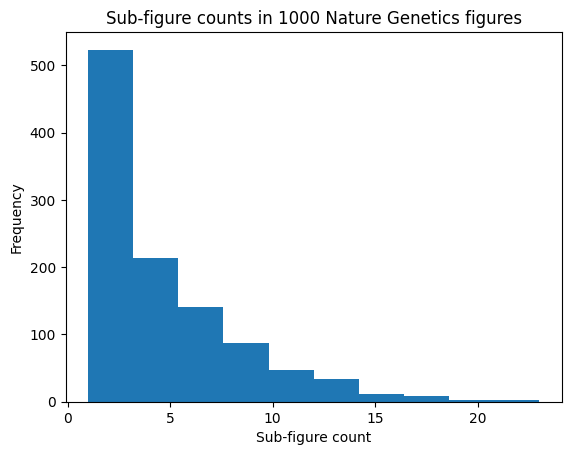

In [76]:
subfigure_counts = []
for caption in figure_data["fig_desc"]:
    subfigure_counts.append(count_subfigures(caption))

plt.hist(subfigure_counts)
plt.title("Sub-figure counts in 1000 Nature Genetics figures")
plt.xlabel("Sub-figure count")
plt.ylabel("Frequency")